$$ \huge\text{Kaggle Titanic} $$

$$ \small\text{Titanic: Machine Learning from Disaster}$$

$$ \large\text{Andrew Ribeiro - June 2018 -  Andrew@kexp.io }$$
![Titanic](notebook_images/4679-004-8C0793EF.jpg)
**Index**
1. Introduction 
    1. About this Notebook 
    2. Competition Overview
    3. Key Challenges of Using a Neural Network
2. Import Libraries and Load Data
3. Exploratory Data Analysis ( EDA )
    1. Visualizations 
    2. Feature Engineering
    3. Naive Baselines
4. Extract, Transform, and Load ( ETL )
    1. Preprocess Data
    2. Validation/Training Split
5. Modeling
    1. The Kitchen Sink
    2. Neural Network
6. Neural Network Evaluation
    1. Learning Curves 
    2. Cross-Validation 
    3. Confusion Matrix
7. Application to Test Set
8. Next Steps


# 1. Introduction
**About this Notebook **

This notebook explores the process of using a neural network to produce a predictive model of the titanic dataset hosted on kaggle. There are many steps in this process that must not be overlooked or it will be more difficult to optimize the performance of your network. In particular, taking time to do EDA, feature engineering, and be considerate when preprocessing the data will stave of many potential modeling headaches later on. It is our aim to make you comfortable with the basics of each of these stages, so you can effectively use neural networks on your data. 

Learning Objectives:
* Learn how to use neural networks on small datasets. 
* Become familiar with the data science process. 


**Competition Overview  **

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

[Kaggle Competition Source](https://www.kaggle.com/c/titanic)

**Key Challenges of Using a Neural Network**

The number of parameters a statistical model has generally determines the range of functions it can represent. We call this range the *capacity* of a model. Models with greater capacity have a tendency to overfit the training data. Neural Networks are the epitome of high-capacity models. High-capacity models generally don't do well on small datasets. Large datasets balance out a neural network's tendency to overfit. With small datasets, we must pay great attention to how we regularize the network in order to fight this overfitting behavior. While there are many ways of doing this, in this notebook we will be using the dropout method. 

The Titanic data is a very small dataset of about 800 or so samples. This means our success is dependent upon proper regularization of the network. Lower capacity models like random forests or svms would do much better out of the box because they will not overfit as reaidly; however, if we tune the network well, we can generally beat their performance. 


# 2. Import Libraries and Load Data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# General Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Scikit-Learn Libraries
from sklearn.metrics import log_loss,mean_squared_error
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split,learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model,svm,tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Keras Libraries 
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Model,load_model
from keras.layers import Input, Dense, Dropout, Concatenate, BatchNormalization

# Interactive Widgets
from ipywidgets import interact
from IPython.display import display

# Load Data
trainDF = pd.read_csv("./data/titanic/train.csv")
testDF = pd.read_csv("./data/titanic/test.csv")

C:\Users\Andre\Anaconda3\envs\RefreshEnv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 2. Exploratory Data Analysis ( EDA )
We will begin by exploring the dataset. Getting a feel for the data helps us determine what features we want to use in our model and how we may process them in the ETL stage. In addition, we will compute some baselines based on our initial understanding of the data and use them later when we are evaluating our model's performance. 

In [3]:
# Show the head of the data. 
trainDF.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Visualizations

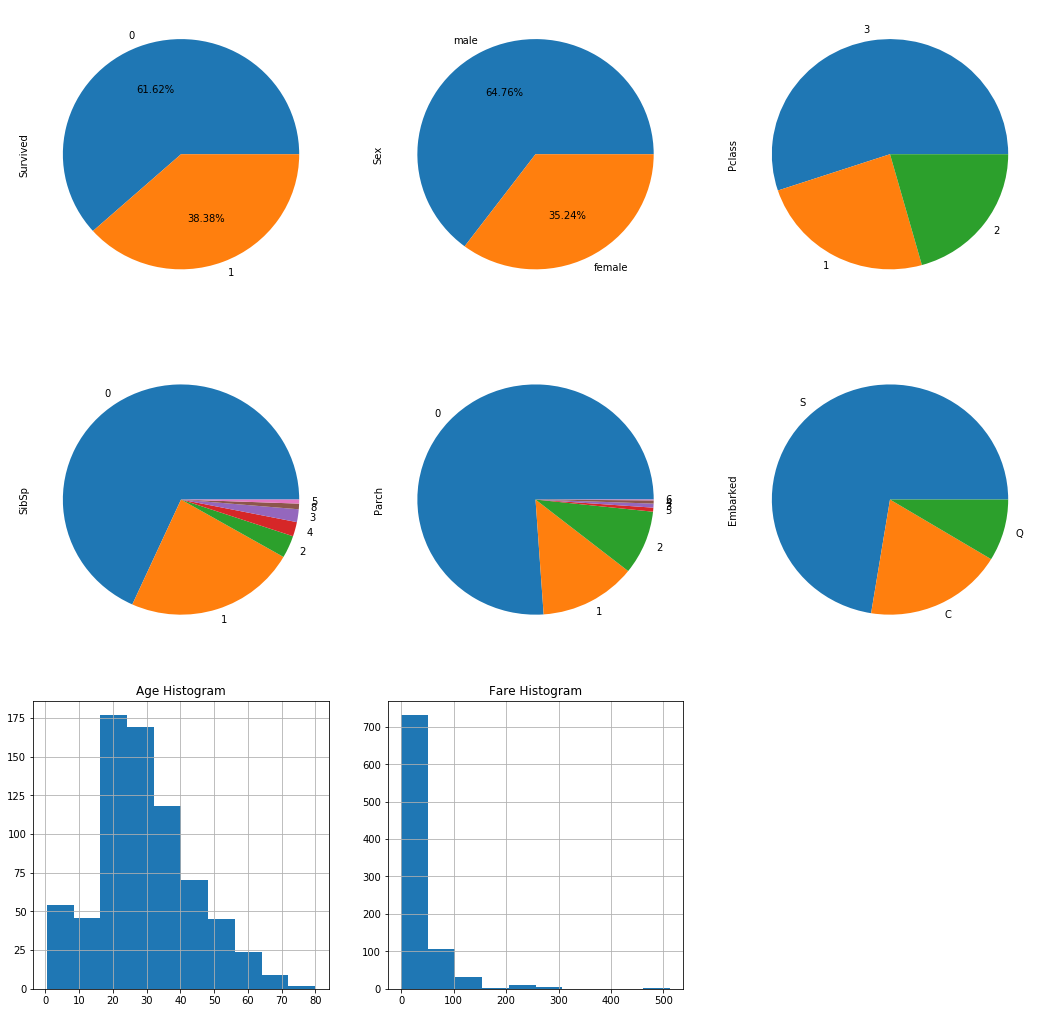

In [4]:
nRows = 3
nCols = 3

plt.figure(figsize=(6*3,6*3))
plt.subplot(nRows,nCols,1)

trainDF["Survived"].value_counts().plot.pie(autopct="%.2f%%")

plt.subplot(nRows,nCols,2)
trainDF["Sex"].value_counts().plot.pie(autopct="%.2f%%")

plt.subplot(nRows,nCols,3)
trainDF["Pclass"].value_counts().plot.pie()

plt.subplot(nRows,nCols,4)
trainDF["SibSp"].value_counts().plot.pie()

plt.subplot(nRows,nCols,5)
trainDF["Parch"].value_counts().plot.pie()

plt.subplot(nRows,nCols,6)
trainDF["Embarked"].value_counts().plot.pie()

plt.subplot(nRows,nCols,7)
plt.title("Age Histogram")
trainDF["Age"].hist()

plt.subplot(nRows,nCols,8)
plt.title("Fare Histogram")
trainDF["Fare"].hist()

plt.show()

From the visualizations, we can make the following observations: 
* The distribution of the genders is very similar to the distribution of survivors. We know from history that there was a policy on ships to give precedence to women and children when boarding the liferafts, so this result is not surprising; however, the distributions are different, so some men did board the liferafts. 

### Feature Engineering

**1.) How many passengers are children?** 

We ask this question because we would like to determine which men were children, since we know being a woman or child has a better chance of being on the lifeboats and therefore has a greater chance of survival. The most obvious fields for deriving this feature are: Age, PArch, and SibSp. We will use age here. We must, however, make an assumption as to what age marks a child.

In [5]:
# Plot
def plotChilds(ageThresh=10):
    df = trainDF["Age"].dropna()
    childFeat = df.map(lambda x: x<ageThresh)
    
    plt.figure(figsize=(12,12))
    
  
    plt.subplot(221)
    plt.title("Size of Age Group")
    childFeat.value_counts().plot.pie(autopct="%.2f%%")
    
    
    newDF = trainDF.assign(isChild=df.map(lambda x: x<ageThresh))
    res = newDF.groupby("isChild")["Survived"]
    adultC,childC = res.count()
    adultS,childS = res.sum()
    
    plt.subplot(222)
    plt.title("Age Group Survival")
    plt.pie([childC-childS,childS],labels=["Died","Survived"],autopct="%.2f%%")
    
    plt.subplot(223)
    plt.title("Age Group Gender Distribution")
    newDF.groupby("isChild")["Sex"].value_counts()[1].plot.pie(autopct="%.2f%%")
    
    plt.subplot(224)
    plt.title("Age Group Class Distribution")
    newDF.groupby("isChild")["Pclass"].value_counts()[1].plot.pie(autopct="%.2f%%")
    
    plt.show()
    
interact(plotChilds,ageThresh=(0,100))

interactive(children=(IntSlider(value=10, description='ageThresh'), Output()), _dom_classes=('widget-interact',))

<function __main__.plotChilds>

### Naive Baselines

In [6]:
def meanBaseline(df):
    nRows = df["Survived"].shape[0]
    mean = df["Survived"].sum()/nRows
    return log_loss(df["Survived"],np.full(nRows,mean))

def genderBaseline(df):
    nRows = df["Survived"].shape[0]
    pred = df["Sex"].map(lambda x: 1 if x == "female" else 0)
    res = df["Survived"]==pred
    return res.sum()/res.count()

print("Mean Baseline: {0}".format(meanBaseline(trainDF)))
print("Gender Baseline: {0}".format(genderBaseline(trainDF)))

Mean Baseline: 0.6659119735267652
Gender Baseline: 0.7867564534231201


#  3. Extract, Transform, and Load ( ETL )

### Preprocess Data
Here we do some simple preprocessing. Mainly we translate categorical variables to a one-hot representation and fill missing values with zeros. We do not use the cabin, ticket, or name features in this notebook in order to keep things simple.

In [7]:
# Our prepprocessing function which is applied to every row of the target dataframe. 
def preprocessRow(row):
    # Process Categorical Variables - One-Hot-Encoding
    sex      = [0,0]
    embarked = [0,0,0]
    pclass   = [0,0,0]
    
    if row["Sex"] == "male":
        sex = [0,1]
    elif row["Sex"] == "female":
        sex = [1,0]
    
    if row["Embarked"] == "S":
        embarked = [0,0,1]
    elif row["Embarked"] == "C":
        embarked = [0,1,0]
    elif row["Embarked"] == "Q":
        embarked = [1,0,0]
    
    if row["Pclass"] == 1:
        pclass   = [0,0,1]
    elif row["Pclass"] == 2:
        pclass   = [0,1,0]
    elif row["Pclass"] == 3:
        pclass   = [1,0,0]
 
    return pclass+sex+[row["Age"],row["SibSp"],row["Parch"],row["Fare"]]+embarked

# Labels for the feature columns. 
featureLabels = ["3 Class","2 Class","1 Class","Female","Male","Age","SibSp",
                 "Parch","Fare","Q Embarked","C Embarked","S Embarked"]

# Fill Missing Values
testDF = testDF.fillna(0)
trainDF = trainDF.fillna(0).sample(frac=1)

# Preprocess Data
data = np.stack(trainDF.apply(preprocessRow,axis=1).as_matrix())

# View what the training vectors look like. 
pd.DataFrame(data).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.2292,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,60.0,1.0,1.0,79.2000,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,21.0,0.0,0.0,77.9583,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,31.0,1.0,1.0,26.2500,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.0000,0.0,0.0,1.0


### Validation/Training Split
In order to plot our learning curves, which allow us to understand how well our model is performing, we need a training and validation set. We train on the training set and hold out the validation set. Since our model is not exposed to the validation data during training, we can use it to determine how well our model generalizes to new data. 

In [8]:
# Size of validation set. 
splitSize = 0.2

X, y = [data, trainDF["Survived"].values]
train_x, validation_x, train_y , validation_y = train_test_split(X,y, test_size=splitSize)

In [12]:
def trainValMetrics(validation_x,train_x):
    valMeans = np.mean(validation_x,axis=0)
    trainMeans = np.mean(train_x,axis=0)

    df = pd.DataFrame().assign(Training_Means=trainMeans,Validation_Means=valMeans,
                               Diff_Perc=np.abs((1 - (trainMeans/valMeans))*100))

    df.index = featureLabels

    return df,mean_squared_error(valMeans,trainMeans)

df,mse = trainValMetrics(validation_x,train_x)

display(df)
print("MSE: {0:7f}".format(mse))

,Training_Means,Validation_Means,Diff_Perc
3 Class,0.550562,0.553073,0.453978
2 Class,0.206461,0.206704,0.117674
1 Class,0.242978,0.240223,1.146459
Female,0.360955,0.318436,13.352553
Male,0.639045,0.681564,6.238488
Age,23.919831,23.319832,2.572913
SibSp,0.522472,0.525140,0.508009
Parch,0.393258,0.335196,17.322097
Fare,32.816543,29.768552,10.238963
Q Embarked,0.089888,0.072626,23.768366


MSE: 0.804847


Since our dataset is small, there is a great chance that holding out the validation set will skew our results. A naive thing we may want to do is ensure that our validation and training set are statistically similar; however, this will produce a heavy bias and introduce indirect leakage from the validation set into the training set. In this next section, we will will randomly partition the dataset, in a monte carlo manner, for a set number of itterations and calculate the maximum and minimum MSE between the means of the training and validation partitions. We then introduce a score which represents the middle ground between these two extremes. 

In [10]:
# How many times we will randomly partition and compute the MSE.
partitionItter = 100000

# Default dummy MSE
lowestMSE = 100000
highestMSE = 0

for i in range(partitionItter):
    t_train_x, t_validation_x, t_train_y , t_validation_y = train_test_split(X,y, test_size=0.1)
    valMeans = np.mean(t_validation_x,axis=0)
    trainMeans = np.mean(t_train_x,axis=0)
    
    mse = mean_squared_error(valMeans,trainMeans)
    if mse < lowestMSE:
        lowestMSE = mse
        
    if mse > highestMSE:
        highestMSE = mse

def AScore(highMSE,lowMSE):
    return np.exp(np.abs(np.log(highMSE)-np.abs(np.log(lowMSE))))

print("Highest MSE: {0:7f}".format(highestMSE))
print("Lowest  MSE: {0:7f}".format(lowestMSE))
print("AScore:      {0:7f}".format(AScore(highestMSE,lowestMSE)))

Highest MSE: 70.783882
Lowest  MSE: 0.000924
AScore:      15.294195


# 4. Modeling


### The Kitchen Sink 
In this section we will train many scikit models in order to gain some perspective on how different models perform on the data. What is absent here is hyperparameter adjustment, so we must take these results with a grain of salt. The results here do not represent the optimal result we can get with these models -- we'd need to tune hyperparams for that. 

In [10]:
models = {"Linear Regression":linear_model.LinearRegression(),"Logistic Regression":linear_model.LogisticRegression(),
         "Ridge Regression":linear_model.Ridge(),"Lasso Regression":linear_model.Lasso(),
         "Bayesian Ridge Regression":linear_model.BayesianRidge(),"Perceptron":linear_model.Perceptron(max_iter=1000),
         "Support Vector Machine":svm.SVC(),"Gaussian Naive Bayes":GaussianNB(),"Decision Tree":tree.DecisionTreeClassifier(),
         "Random Forest":RandomForestClassifier(),"AdaBoost":AdaBoostClassifier(),
         "Gradient Boosting":GradientBoostingClassifier()}
kFolds = 40

def scoringFN(model,X,y):
    pred = model.predict(X)
    pred[pred <= 0.5] = 0
    pred[pred > 0.5] = 1
    return np.sum(y == pred)/y.shape[0]

for mod in models:
    model = models[mod]
    cross_val = cross_val_score(model, X, y,cv=kFolds,scoring= scoringFN).mean()
   
    print("{0:30} {1} Fold Cross-Validation Accuracy: {2:7f}".format(mod,kFolds,cross_val))

Linear Regression              40 Fold Cross-Validation Accuracy: 0.783547
Logistic Regression            40 Fold Cross-Validation Accuracy: 0.790686
Ridge Regression               40 Fold Cross-Validation Accuracy: 0.783547
Lasso Regression               40 Fold Cross-Validation Accuracy: 0.653063
Bayesian Ridge Regression      40 Fold Cross-Validation Accuracy: 0.783547
Perceptron                     40 Fold Cross-Validation Accuracy: 0.759660
Support Vector Machine         40 Fold Cross-Validation Accuracy: 0.729265
Gaussian Naive Bayes           40 Fold Cross-Validation Accuracy: 0.781470
Decision Tree                  40 Fold Cross-Validation Accuracy: 0.787947
Random Forest                  40 Fold Cross-Validation Accuracy: 0.796337
AdaBoost                       40 Fold Cross-Validation Accuracy: 0.800887
Gradient Boosting              40 Fold Cross-Validation Accuracy: 0.821069


From the results displayed above we can see that the gradient boosting method achieved the best results with the default hyperparameters. We will now adjust the parameters of the gradient boosting model and analyze the resulting learning curves. 

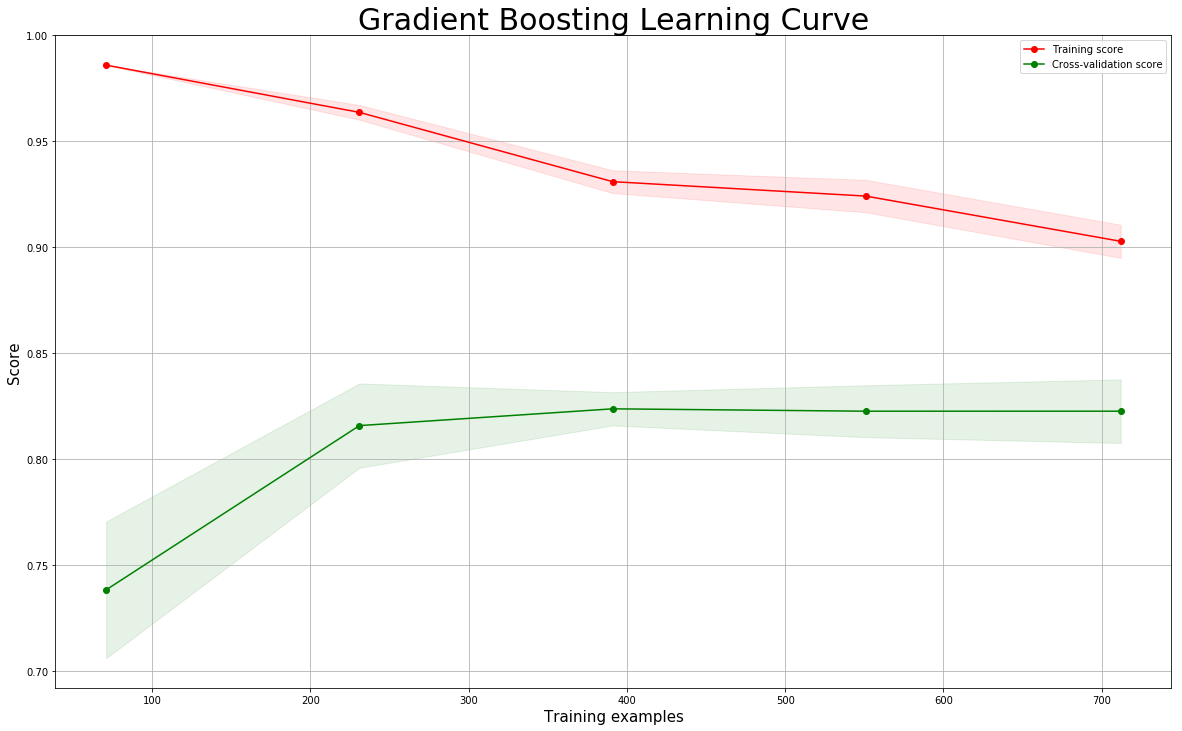

In [11]:
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(20,12))
    plt.title(title,size=30)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples",size=15)
    plt.ylabel("Score",size=15)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Gradient Boosting Classifier Parameters (Partial List)
learning_rate     = 0.1
n_estimators      = 100
max_depth         = 3
min_samples_split = 2
subsample         = 1

# Define the gradient boosting classifier. 
gradBoost = GradientBoostingClassifier(learning_rate=learning_rate,n_estimators=n_estimators,
                                       max_depth=max_depth,min_samples_split=min_samples_split,subsample=subsample)

# Plot the learning curve of the gradient boosting classifier. 
plot_learning_curve(gradBoost,"Gradient Boosting Learning Curve",X,y,cv=5).show()

# Fit model on the full dataset. 
gradBoost.fit(X,y)

# Apply the model to the test set. 
dat = np.stack(testDF.fillna(0).apply(preprocessRow,axis=1))

pred = gradBoost.predict(dat)

pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1

# Create a CSV to submit to kaggle. 
data_to_submit = pd.DataFrame.from_items([
    ('PassengerId',testDF["PassengerId"]),
    ('Survived', pred.astype(int))])

data_to_submit.to_csv('gradBoost.csv', index = False)

We will lastly use the boosted tree model to determine feature importance. Feature importance is calculated by how effective each feature is at splitting the classes. 

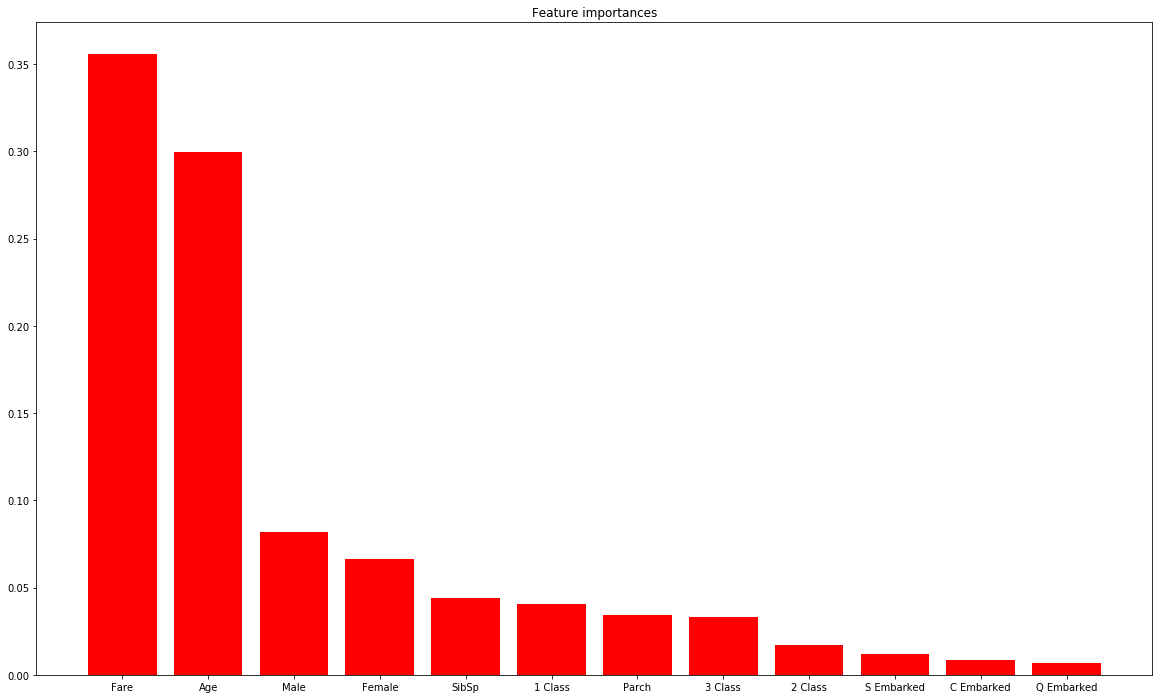

In [12]:
importances = gradBoost.feature_importances_
indices = np.argsort(importances)[::-1]
indiciesNames = list(map(lambda x: featureLabels[x], indices))

# Plot the feature importances of the forest
plt.figure(figsize=(20,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indiciesNames)
plt.xlim([-1, X.shape[1]])
plt.show()

### Neural Network
** Architectural Considerations **
* Depth of Network:
* Width of Network:
* Activation Functions: 
* Regularization: 
* Loss Function: 

** Training Considerations **
* Batch Size 
* Optimizer 
* Number of Epochs 

** Neural Network Setup **

In [13]:

# Training Hyperparameters
batch_size = 300
epochs = 1000

# Model Hyperparameters 
nLayers = 3
layerSize = 80
dropoutPercent = 0.87# Regularization 
lossFn = 'binary_crossentropy'
optimizer = 'adam'
activationFn = 'sigmoid'


# Model Architecture 
def makeModel(nLayers,layerSize,dropoutPercent,lossFn,optimizer):
    inputs = Input(shape=(train_x.shape[1],),name="input")
    normedInputs = BatchNormalization()(inputs)
    x = None 
    
    for layer in range(nLayers):
        if x == None:
            x = normedInputs 

        x = Dense(layerSize, activation=activationFn,name="fc"+str(layer))(x)
        x = Dropout(dropoutPercent,name="fc_dropout_"+str(layer))(x)

    out = Dense(1,activation=activationFn, name="output")(x)

    model = Model(inputs=inputs, outputs=out)
    model.compile(optimizer=optimizer,
                  loss=lossFn,
                  metrics=['acc'])
    
    return model

modelMain = makeModel(nLayers,layerSize,dropoutPercent,lossFn,optimizer)
modelMain.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 12)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
fc0 (Dense)                  (None, 80)                1040      
_________________________________________________________________
fc_dropout_0 (Dropout)       (None, 80)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 80)                6480      
_________________________________________________________________
fc_dropout_1 (Dropout)       (None, 80)                0         
_________________________________________________________________
fc2 (Dense)                  (None, 80)                6480      
__________

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

** Training **

We will now train our neural network on the training data. 

In [184]:
trainOnFullData = False

# We create a callback that saves the best model in respect to maximizing validation accuracy.
checkpoint =  ModelCheckpoint(monitor='val_acc',filepath='bestModel.hdf5', verbose=0, save_best_only=True)

# Here we train the model on the training data and store the training history so we can evaluate it in the next step. 
if trainOnFullData:
    hist = modelMain.fit(X, y,validation_data=(validation_x,validation_y),
                     callbacks=[checkpoint], batch_size=batch_size,epochs=epochs, verbose=0)
else:
    hist = modelMain.fit(train_x, train_y,validation_data=(validation_x,validation_y),
                         callbacks=[checkpoint], batch_size=batch_size,epochs=epochs, verbose=0)

# 5. Evaluation
At this point we have defined a neural network and trained it. In this section, we will use three methods for evaluating how well our neural network models the data. When doing data science in practice, you would go between evaluating the model and changing the parameters or having an algorithm like grid-search do it for you.

### Learning Curves 

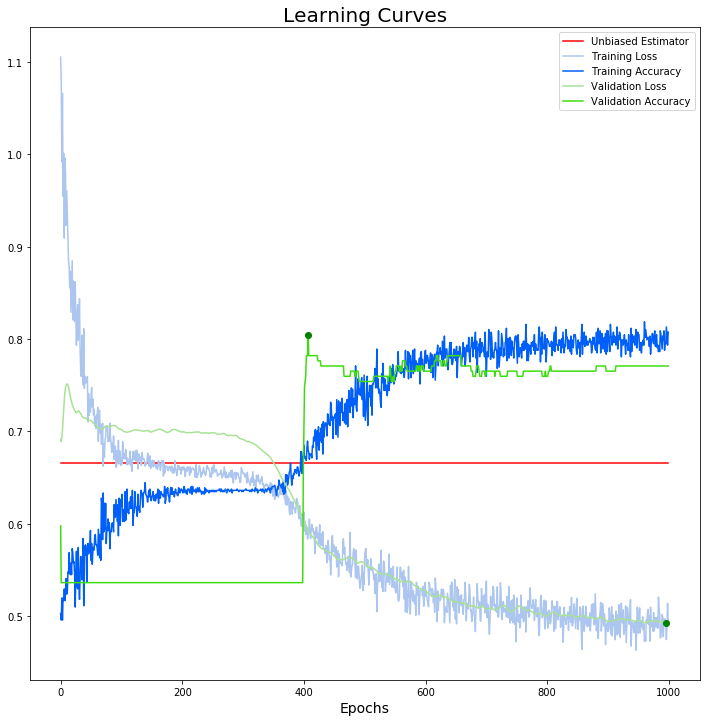

Max validation accuracy: 0.8044692873954773
Minimum validation loss: 0.49268847703933716


In [185]:
def learningCurves(hist):
    histAcc_train = hist.history['acc']
    histLoss_train = hist.history['loss']
    histAcc_validation = hist.history['val_acc']
    histLoss_validation = hist.history['val_loss']
    maxValAcc = np.max(histAcc_validation)
    minValLoss = np.min(histLoss_validation)

    plt.figure(figsize=(12,12))

    plt.plot(range(epochs),np.full(epochs,meanBaseline(trainDF)),label="Unbiased Estimator", color="red")

    plt.plot(range(epochs),histLoss_train, label="Training Loss", color="#acc6ef")
    plt.plot(range(epochs),histAcc_train, label="Training Accuracy", color = "#005ff9" )

    plt.plot(range(epochs),histLoss_validation, label="Validation Loss", color="#a7e295")
    plt.plot(range(epochs),histAcc_validation, label="Validation Accuracy",color="#3ddd0d")

    plt.scatter(np.argmax(histAcc_validation),maxValAcc,zorder=10,color="green")
    plt.scatter(np.argmin(histLoss_validation),minValLoss,zorder=10,color="green")

    plt.xlabel('Epochs',fontsize=14)
    plt.title("Learning Curves",fontsize=20)

    plt.legend()
    plt.show()

    print("Max validation accuracy: {0}".format(maxValAcc))
    print("Minimum validation loss: {0}".format(minValLoss))

learningCurves(hist)

NameError: name 'modelMain' is not defined

In [4]:
modelMain

NameError: name 'modelMain' is not defined

### Cross-Validation
![](notebook_images/K-fold_cross_validation_EN.jpg)

If our learning curve indicates healthy learning ( i.e. the training and validation metrics do not diverge ), we may want to use a cross-validation method in order to get a more accurate estimation of how well our model generalizes to new data. We will use  a technique called called k-fold cross-validation. 

In [186]:
 # Cross-Validation Parameter 
kFolds = 3

kfold = StratifiedKFold(n_splits=kFolds, shuffle=True)
means = []
stds = []
lossesLs = []
accuracyLs = []

runningLoss = []
runningAccuracy = []

# Train on k-folds of the data. 
for train, test in kfold.split(X, y):
    
    # Create new instance of our model. 
    model = makeModel(nLayers,layerSize,dropoutPercent,lossFn,optimizer)
    
    # Train the model on this kfold. 
    model.fit(X[train], y[train],batch_size=batch_size,epochs=epochs, verbose=0)

    # Evaluate the model
    loss,acc = model.evaluate(X[test], y[test], verbose=0)
    
    # Log Cross-Validation Data
    lossesLs.append(loss)
    accuracyLs.append(acc)
    mean = np.mean(lossesLs)
    std = np.std(lossesLs)
    
    accuracyMean = np.mean(accuracyLs)
    accuracyStd = np.std(accuracyLs)
    
    runningLoss.append(mean)
    runningAccuracy.append(accuracyMean)
    
    print("Loss: %.2f%% (+/- %.2f%%) | Accuracy: %.2f%% (+/- %.2f%%)" % (mean*100,std,accuracyMean*100,accuracyStd))

plt.show()

Loss: 48.05% (+/- 0.00%) | Accuracy: 80.47% (+/- 0.00%)
Loss: 47.38% (+/- 0.01%) | Accuracy: 79.80% (+/- 0.01%)
Loss: 48.35% (+/- 0.01%) | Accuracy: 79.46% (+/- 0.01%)


### Confusion Matrix

# 6. Application to Test Set
Now that we have designed, trained, and evaluated our neural network, we will apply it to the training set and save the results to a csv file which can be uploaded to kaggle for scoring. 

In [187]:
useBestModel = False

# The thrshold function which assigns a class of 0 or 1 based on the sigmoid output of the network. 
def thresholdFn(x):
    if(x < 0.5):
        return 0
    else:
        return 1

if useBestModel:
    # Load the model with the parameters that yielded the best validation accuracy. 
    model = load_model("bestModel.hdf5")
    pred = model.predict(np.stack(testDF.apply(preprocessRow,axis=1)))
else:
    # Apply the model to the test set.
    pred = modelMain.predict(np.stack(testDF.apply(preprocessRow,axis=1)))
    
# Save the predictions to a CSV file in the format suitable for the competition. 
data_to_submit = pd.DataFrame.from_items([
    ('PassengerId',testDF["PassengerId"]),
    ('Survived', pd.Series(np.hstack(pred)).map(thresholdFn))])

data_to_submit.to_csv('neuralNet.csv', index = False)

# 7. Next Steps
This notebook introduced a simple workflow of the stages involved in modeing categorical and continuous tabular data with neural networks. Here are some of the next steps you can take to make your analysis more robust:

* Implement a hyperparameter search procedure. A common approach is grid search.
* Add more features from the training set. In this notebook we ignore several columns like name and cabin. Figuring out how to include these features may help make better predictions. 

![](notebook_images/Iceberg_in_the_Arctic_with_its_underside_exposed.jpg)